In [1]:
import pandas as pd

In [2]:
import numpy as np


In [4]:
df = pd.read_csv("/content/GOUT-CC-2019-CORPUS-REDACTED.csv")

In [52]:
df.tail()

,Chief Complaint,Predict,Consensus
295,"upper abd/R side chest pain x1 month, new onse...",N,N
296,"upper lip swelling x one day, pmh HTN, COPD, b...",N,N
297,walked outside of a gas station and began bein...,N,-
298,was getting prepped for colonoscopy and was se...,N,N
299,Was seen at <<HOSPITAL>> after an MVC. Pt stat...,N,N


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df.isnull().sum()

Chief Complaint    0
Predict            0
Consensus          0
dtype: int64

In [13]:
X = df.drop(['Predict','Consensus'], axis=1)

In [14]:
X.head()

,Chief Complaint
0,"""been feeling bad"" last 2 weeks & switched BP ..."
1,"""can't walk"", reports onset at <<TIME>>. orien..."
2,"""dehydration"" Chest hurts, hips hurt, cramps P..."
3,"""gout flare up"" L arm swelling x 1 week. denie..."
4,"""heart racing,""dyspnea, and orthopnea that has..."


In [53]:
y = df['Predict']

In [54]:
y.head()

0    N
1    Y
2    Y
3    Y
4    N
Name: Predict, dtype: object

In [55]:
y.isnull().sum()

0

In [19]:
messages = X.copy()

In [20]:
messages.loc[50:52]

,Chief Complaint
50,C/O LLE swelling/stiff x2d and radiating into ...
51,c/o lower mid abd pain that radiates to his ba...
52,C/o mid abdominal pain x 5 hrs. PMH: depressio...


In [23]:
messages['Chief Complaint'][0]

'"been feeling bad" last 2 weeks & switched BP medications last week & worried about BP PMHx: CHF, HTN, gout, 3 strokes, DM'

In [24]:
import re  

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [25]:
messages['Chief Complaint']= messages['Chief Complaint'].apply(str)

In [29]:
from nltk.corpus import stopwords

In [31]:
pip install stopwords

In [33]:
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Chief Complaint'][i])
    review = review.lower()
    review = review.split()    # to get the list of keywords in the form of vector to apply stopwords,stemming etc
    
    
    review = ' '.join(review) # combining all the sentences with spaces (see below)
    corpus.append(review)        # append me last me list add hota hai..  [123] append [45] -- [123[45]]

In [34]:
corpus

['been feeling bad last weeks switched bp medications last week worried about bp pmhx chf htn gout strokes dm',
 'can t walk reports onset at time oriented x aortic valve replacement in date wife reports episode of similar last week hospitalized at hospital for uti gout pmhx cva l side residual deficits',
 'dehydration chest hurts hips hurt cramps pmh hip replacement gout missed pain clinic appt today thinks he has a gout flair up knee and foot pain',
 'gout flare up l arm swelling x week denies any other pmh',
 'heart racing dyspnea and orthopnea that has been getting worse over the last days hr pmh a fib htn pte gout elaquis',
 'i started breathing hard hx htn gout anxiety',
 'i think i have a gout flare up l wrist pain swelling since time hx afib gout htn',
 'i want to see if i have an infection pt vague about symptoms and having gout flare up big toe swollen feet hurt pmhx gout htn',
 'my gout done flared up on me c o r ankle l shoulder and chronic lower back pain pmh gout',
 'my g

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=20000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [38]:
X.shape

(300, 10119)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [57]:
cv.get_feature_names()[:10]

['ab',
 'ab pain',
 'ab pain days',
 'abcess',
 'abcess on',
 'abcess on spine',
 'abcess to',
 'abcess to breast',
 'abd',
 'abd constant']

In [58]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 20000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [59]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.loc[20:40]

,ab,ab pain,ab pain days,abcess,abcess on,abcess on spine,abcess to,abcess to breast,abd,abd constant,abd constant buring,abd cramping,abd cramping pt,abd lue,abd lue also,abd pain,abd pain and,abd pain day,abd pain months,abd pain nv,abd pain one,abd pain or,abd pain pmh,abd pain pmhx,abd pain pt,abd pain recently,abd pain that,abd side,abd side chest,abd swelling,abd swelling fatigue,abdomen,abdomen and,abdomen and back,abdomen and groin,abdomen pmh,abdomen pmh cirrhosis,abdomen pt,abdomen pt reports,abdominal,...,years mri date,years pmh,years pmh gout,yesterday,yesterday am,yesterday am pmh,yesterday and,yesterday and had,yesterday chest,yesterday chest pain,yesterday denies,yesterday denies injury,yesterday dizziness,yesterday dizziness denies,yesterday evening,yesterday evening pt,yesterday hr,yesterday hr noted,yesterday in,yesterday in left,yesterday lower,yesterday lower abdomen,yesterday per,yesterday per ems,yesterday plan,yesterday plan to,yesterday pmh,yesterday pmh gout,yesterday pmh heart,yesterday pmhx,yesterday pmhx htn,yesterday seen,yesterday seen at,yesterday states,yesterday states pain,yesterday sts,yesterday sts the,zofran,zofran im,zofran im pta
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn import metrics
import numpy as np
import itertools

In [45]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [60]:
import matplotlib.pyplot as plt

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)

accuracy:  0.567


In [61]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
y_pred = svclassifier.predict(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 0  0  1]
 [ 5  0  8]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.86        16
           U       0.00      0.00      0.00         1
           Y       0.89      0.62      0.73        13

    accuracy                           0.80        30
   macro avg       0.55      0.54      0.53        30
weighted avg       0.79      0.80      0.78        30



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DECION TREE

now the accuracy is 80%, earlier it was 40% when i took concensus as the y column. here we have taken prediction as the y column.

In [64]:
from sklearn import tree


clf = tree.DecisionTreeClassifier(random_state=0)

In [65]:
clf = clf.fit(X_train, y_train)

[Text(531.1730769230769, 526.6125000000001, 'X[3539] <= 1.5\ngini = 0.543\nsamples = 270\nvalue = [160, 26, 84]'),
 Text(512.7774725274725, 492.63750000000005, 'X[6419] <= 0.5\ngini = 0.491\nsamples = 239\nvalue = [160, 26, 53]'),
 Text(317.3241758241758, 458.6625, 'X[3641] <= 0.5\ngini = 0.297\nsamples = 129\nvalue = [107, 12, 10]'),
 Text(298.9285714285714, 424.6875, 'X[7063] <= 0.5\ngini = 0.267\nsamples = 126\nvalue = [107, 12, 7]'),
 Text(280.532967032967, 390.7125, 'X[2609] <= 0.5\ngini = 0.244\nsamples = 124\nvalue = [107, 12, 5]'),
 Text(262.1373626373626, 356.7375, 'X[3871] <= 0.5\ngini = 0.222\nsamples = 122\nvalue = [107, 10, 5]'),
 Text(211.54945054945054, 322.76250000000005, 'X[2886] <= 0.5\ngini = 0.187\nsamples = 118\nvalue = [106, 8, 4]'),
 Text(165.56043956043953, 288.7875, 'X[8584] <= 0.5\ngini = 0.162\nsamples = 115\nvalue = [105, 6, 4]'),
 Text(128.76923076923077, 254.8125, 'X[6131] <= 0.5\ngini = 0.108\nsamples = 106\nvalue = [100, 3, 3]'),
 Text(110.37362637362637

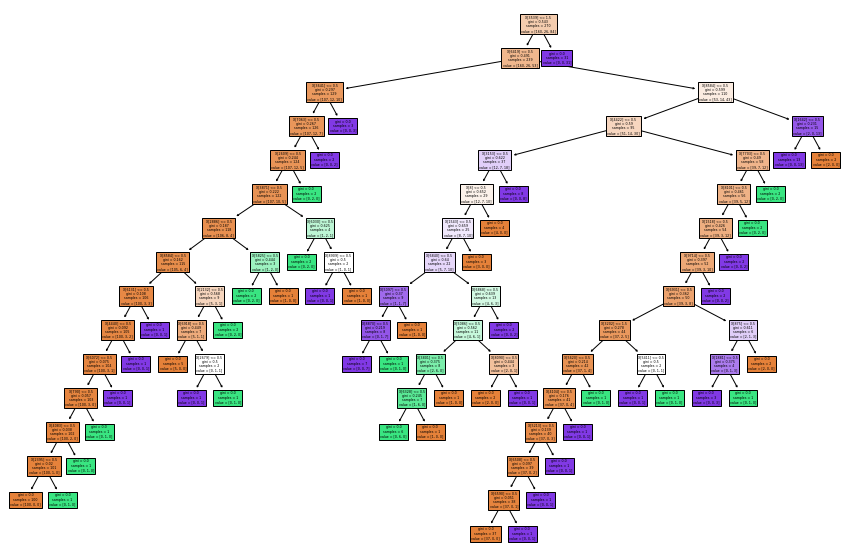

In [66]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [67]:
print(tree.export_text(clf))

|--- feature_3539 <= 1.50
|   |--- feature_6419 <= 0.50
|   |   |--- feature_3641 <= 0.50
|   |   |   |--- feature_7063 <= 0.50
|   |   |   |   |--- feature_2609 <= 0.50
|   |   |   |   |   |--- feature_3871 <= 0.50
|   |   |   |   |   |   |--- feature_2886 <= 0.50
|   |   |   |   |   |   |   |--- feature_8584 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_6131 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_4440 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_6072 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_6072 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Y
|   |   |   |   |   |   |   |   |   |--- feature_4440 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: Y
|   |   |   |   |   |   |   |   |--- feature_6131 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: Y
|   |   |   |   |   |   |   |--- feature_8584 >  0.50
|   |   |   |  

In [68]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.6666666666666666

Now lets check it with LOGISTIC REGRESSION 

In [69]:
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0) 

In [71]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred = LogReg.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[12,  0,  4],
       [ 0,  0,  1],
       [ 4,  0,  9]])

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.75      0.75      0.75        16
           U       0.00      0.00      0.00         1
           Y       0.64      0.69      0.67        13

    accuracy                           0.70        30
   macro avg       0.46      0.48      0.47        30
weighted avg       0.68      0.70      0.69        30



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PASSIVE AGGRESSIVE CLASSIFIER [ONLINE LEARNING PROBLEM]

In [75]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

In [76]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy of passiveAgressive is: %0.3f" % score)

accuracy of passiveAgressive is: 0.700


In [89]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(clf, learning_rate = 0.6)
adb.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [90]:
adb.score(X_test,y_test)

0.6333333333333333